**Reference for Template design: Anthony So**

---
---
***C. PART C : EXPERIMENT ON MULTIVARIATE LINEAR REGRESSION WITH FEATURE ENGINEERING***
---
---

**I. Load and Explore Dataset**

In [ ]:
%pip install pandas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path1='/content/drive/MyDrive/Colab Notebooks/Data/ML/Assignment 1/cancer_us_county-testing.csv'
path2='/content/drive/MyDrive/Colab Notebooks/Data/ML/Assignment 1/cancer_us_county-training.csv'
import pandas as pd
df_test=pd.read_csv(path1)
df_train=pd.read_csv(path2)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.concat([df_train,df_test],axis=0)

In [ ]:
df

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Id
0,88.000000,40,261.0,561.400000,29090,13352,26.8,2771.120431,"[22640, 34218.1]",39.8,...,32.0,47.5,32.9,99.693045,0.044920,0.000000,0.000000,55.499459,6.838710,0
1,73.000000,35,167.3,345.600000,29782,21903,38.8,0.000000,"[22640, 34218.1]",32.3,...,18.8,45.3,34.1,94.791383,1.649850,0.063631,2.854286,52.818296,4.799131,1
2,292.000000,124,191.0,468.400000,41955,48985,15.5,0.000000,"(40362.7, 42724.4]",42.2,...,44.9,34.5,16.0,95.102348,1.741749,0.376429,0.445611,50.560800,3.996826,2
3,1962.667684,7,165.4,453.549422,55378,3007,11.1,0.000000,"(54545.6, 61494.5]",41.6,...,49.6,30.1,15.2,85.833870,0.933677,0.160979,7.244044,52.565181,3.291536,3
4,43.000000,20,160.6,349.700000,26309,8551,35.3,0.000000,"[22640, 34218.1]",43.9,...,30.4,45.1,24.5,24.535525,73.223736,0.394100,1.396239,33.641208,3.166561,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,27.000000,14,187.6,415.700000,50155,4769,12.0,0.000000,"(48021.6, 51046.4]",42.6,...,42.0,27.4,12.1,85.768985,0.616890,0.042544,2.105935,51.104816,6.659013,2247
605,30.000000,9,131.6,444.600000,46961,4854,14.0,0.000000,"(45201, 48021.6]",41.3,...,40.7,30.9,15.8,96.122281,0.800164,0.307755,1.292573,49.671883,5.760870,2947
606,583.000000,258,187.5,429.400000,39907,127780,22.1,62.607607,"(37413.8, 40362.7]",36.9,...,39.8,37.9,22.7,81.407683,6.285701,4.388991,2.247924,47.875108,6.387886,1746
607,1962.667684,31,174.2,453.549422,50905,14219,9.3,0.000000,"(48021.6, 51046.4]",39.1,...,52.1,33.9,17.6,93.756201,1.658398,0.836286,0.290574,45.219595,5.893846,1822


In [ ]:
%pip install dataprep

In [ ]:
from dataprep.eda import plot, create_report
report = create_report(df)
report

Output hidden; open in https://colab.research.google.com to view.

**II. DATA PREPARATION:**



**1. Descriptive statistics**

In [ ]:
df.describe()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Id
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306,1523.000000
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816,879.737461
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419,761.500000
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478,1523.000000
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677,2284.500000
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165,3046.000000


In [ ]:
df.isna().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

**2. Display the observations with missing values**

In [ ]:
df[df['PctSomeCol18_24'].isnull()]

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Id
0,88.000000,40,261.0,561.400000,29090,13352,26.8,2771.120431,"[22640, 34218.1]",39.8,...,32.0,47.5,32.9,99.693045,0.044920,0.000000,0.000000,55.499459,6.838710,0
1,73.000000,35,167.3,345.600000,29782,21903,38.8,0.000000,"[22640, 34218.1]",32.3,...,18.8,45.3,34.1,94.791383,1.649850,0.063631,2.854286,52.818296,4.799131,1
2,292.000000,124,191.0,468.400000,41955,48985,15.5,0.000000,"(40362.7, 42724.4]",42.2,...,44.9,34.5,16.0,95.102348,1.741749,0.376429,0.445611,50.560800,3.996826,2
4,43.000000,20,160.6,349.700000,26309,8551,35.3,0.000000,"[22640, 34218.1]",43.9,...,30.4,45.1,24.5,24.535525,73.223736,0.394100,1.396239,33.641208,3.166561,4
6,1962.667684,36,153.9,453.549422,65373,23298,10.0,0.000000,"(61494.5, 125635]",34.7,...,52.1,23.8,10.7,94.086188,1.290608,0.901657,0.685083,62.609863,8.095893,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,286.000000,122,161.1,393.000000,41736,64362,20.2,15.537118,"(40362.7, 42724.4]",35.6,...,19.5,47.2,27.5,75.956092,3.708013,1.345724,8.291742,48.647964,8.221797,102
604,27.000000,14,187.6,415.700000,50155,4769,12.0,0.000000,"(48021.6, 51046.4]",42.6,...,42.0,27.4,12.1,85.768985,0.616890,0.042544,2.105935,51.104816,6.659013,2247
605,30.000000,9,131.6,444.600000,46961,4854,14.0,0.000000,"(45201, 48021.6]",41.3,...,40.7,30.9,15.8,96.122281,0.800164,0.307755,1.292573,49.671883,5.760870,2947
606,583.000000,258,187.5,429.400000,39907,127780,22.1,62.607607,"(37413.8, 40362.7]",36.9,...,39.8,37.9,22.7,81.407683,6.285701,4.388991,2.247924,47.875108,6.387886,1746


In [ ]:
df[df['PctEmployed16_Over'].isnull()]

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Id
17,1780.000000,748,169.1,418.700000,44976,362895,18.4,286.584274,"(42724.4, 45201]",39.3,...,41.9,37.0,19.8,88.368622,1.084692,2.511063,2.227357,44.094095,4.213583,20
73,407.000000,126,174.0,536.200000,54924,78702,12.3,216.004676,"(54545.6, 61494.5]",39.3,...,57.3,29.0,13.8,96.528112,0.479464,0.523642,0.465171,56.068914,4.763673,91
88,1962.667684,6,141.4,453.549422,46318,2564,12.8,0.000000,"(45201, 48021.6]",41.7,...,43.7,34.5,13.3,95.465300,0.867508,0.670347,0.512618,56.003752,3.783784,111
98,33.000000,11,138.7,380.500000,82597,11065,4.6,0.000000,"(61494.5, 125635]",32.3,...,60.6,18.8,8.5,96.866485,0.360062,0.768782,1.050993,78.075397,6.102877,123
107,55.000000,25,198.5,457.800000,45413,9259,14.4,0.000000,"(45201, 48021.6]",39.6,...,44.1,37.3,18.2,96.012931,0.140086,0.452586,2.661638,51.068376,7.290533,133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,27.000000,13,212.3,458.200000,36027,3618,18.3,0.000000,"(34218.1, 37413.8]",48.5,...,31.0,32.9,13.3,93.109151,1.901874,0.000000,1.323043,48.636100,6.068602,2025
583,214.000000,61,362.8,1206.900000,40207,15234,24.3,0.000000,"(37413.8, 40362.7]",40.3,...,41.0,35.8,22.5,73.964848,21.591732,0.645119,1.533803,50.012877,3.739774,1964
598,139.000000,46,156.1,528.400000,56551,17111,7.4,0.000000,"(54545.6, 61494.5]",48.7,...,41.4,37.2,14.8,97.736783,0.306477,0.229858,0.176814,56.291645,7.152406,2304
599,894.000000,325,167.4,460.900000,68405,176395,7.0,317.469316,"(61494.5, 125635]",41.4,...,60.7,24.3,11.2,95.771345,1.423661,1.143390,0.297430,59.466380,4.599000,2079


In [ ]:
df[df['PctPrivateCoverageAlone'].isnull()]

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Id
9,404.000000,134,150.9,480.700000,44148,63100,16.5,15.847861,"(42724.4, 45201]",42.9,...,45.0,40.7,22.5,96.027111,0.997907,0.465378,0.501296,48.488328,4.741223,9
12,10.000000,5,151.4,300.100000,35924,2206,22.1,0.000000,"(34218.1, 37413.8]",43.1,...,33.5,38.0,17.3,88.338448,6.093819,0.043840,3.156510,51.708428,6.788512,13
16,511.000000,163,156.2,473.800000,59946,144251,15.9,1310.216220,"(54545.6, 61494.5]",29.8,...,60.6,20.9,10.4,84.146849,5.447661,5.971915,1.948564,42.806625,4.117880,18
23,26.000000,10,106.5,357.400000,39572,4312,11.6,0.000000,"(37413.8, 40362.7]",46.9,...,36.6,28.7,9.0,96.632537,0.523322,0.000000,0.068259,50.991080,9.305374,27
32,1003.000000,395,191.5,501.100000,44800,181635,15.6,16.516641,"(42724.4, 45201]",39.8,...,32.1,36.3,19.6,82.068741,10.767423,2.033612,0.616471,47.332234,5.729334,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,1962.667684,9,150.7,453.549422,58543,6133,8.3,0.000000,"(54545.6, 61494.5]",36.1,...,48.4,22.1,11.4,98.351195,0.000000,0.131904,1.071723,64.883721,6.199262,1733
586,17.000000,7,116.0,307.300000,27882,3584,28.5,0.000000,"[22640, 34218.1]",49.0,...,20.6,57.5,31.2,92.962860,0.000000,0.781904,2.094387,44.818119,7.517483,1627
589,175.000000,78,180.1,405.300000,34288,35370,28.8,28.272547,"(34218.1, 37413.8]",37.9,...,31.9,42.8,25.3,65.823139,29.619573,1.077737,2.180668,45.651392,7.919234,1398
592,99.000000,41,183.7,457.400000,35470,18023,24.7,0.000000,"(34218.1, 37413.8]",39.9,...,35.5,43.5,26.4,46.158483,49.342394,0.000000,2.498904,42.751142,4.488542,1737


**3. Replace all missing values with its mean**

In [ ]:
df.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

In [ ]:
df=df.drop('PctSomeCol18_24',axis=1)

In [ ]:
df['PctEmployed16_Over'] = df['PctEmployed16_Over'].fillna(df['PctEmployed16_Over'].mean())

In [ ]:
df['PctPrivateCoverageAlone'] = df['PctPrivateCoverageAlone'].fillna(df['PctPrivateCoverageAlone'].mean())

In [ ]:
df.isnull().sum()

avgAnnCount                0
avgDeathsPerYear           0
TARGET_deathRate           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
binnedInc                  0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
Geography                  0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
Id                         0
dtype: int64

**4. EDA**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3047 entries, 0 to 608
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried           

In [ ]:
# Calculate the mean income per capita for each decile
mean_income_per_decile = df.groupby('binnedInc')['medIncome'].mean()

# Replace each decile value with its corresponding mean income
df['binnedInc'] = df['binnedInc'].map(mean_income_per_decile)

In [ ]:
df=df.drop(['Geography'],axis=1)

In [ ]:
%pip install scikit-learn

In [ ]:
%pip install dataprep

In [ ]:
import dataprep

In [ ]:
from dataprep.eda import create_report,plot

In [ ]:
import numpy as np

In [ ]:
df['avgAnnCount']=np.log1p(df['avgAnnCount'])
df['avgDeathsPerYear']=np.log1p(df['avgDeathsPerYear'])
df['incidenceRate']=np.log1p(df['incidenceRate'])
df['medIncome']=np.log1p(df['medIncome'])
df['popEst2015']=np.log1p(df['popEst2015'])
df['povertyPercent']=np.log1p(df['povertyPercent'])
df['studyPerCap']=np.log1p(df['studyPerCap'])
df['AvgHouseholdSize']=np.log1p(df['AvgHouseholdSize'])
df['PercentMarried']=np.log1p(df['PercentMarried'])
df['PctNoHS18_24']=np.log1p(df['PctNoHS18_24'])
df['PctHS18_24']=np.log1p(df['PctHS18_24'])
df['PctBachDeg18_24']=np.log1p(df['PctBachDeg18_24'])
df['PctHS25_Over']=np.log1p(df['PctHS25_Over'])
df['PctBachDeg25_Over']=np.log1p(df['PctBachDeg25_Over'])
df['PctEmployed16_Over']=np.log1p(df['PctEmployed16_Over'])
df['PctUnemployed16_Over']=np.log1p(df['PctUnemployed16_Over'])
df['PctPrivateCoverage']=np.log1p(df['PctPrivateCoverage'])
df['PctPrivateCoverageAlone']=np.log1p(df['PctPrivateCoverageAlone'])
df['PctEmpPrivCoverage']=np.log1p(df['PctEmpPrivCoverage'])
df['PctPublicCoverage']=np.log1p(df['PctPublicCoverage'])
df['PctPublicCoverageAlone']=np.log1p(df['PctPublicCoverageAlone'])
df['PctWhite']=np.log1p(df['PctWhite'])
df['PctBlack']=np.log1p(df['PctBlack'])
df['PctAsian']=np.log1p(df['PctAsian'])
df['PctOtherRace']=np.log1p(df['PctOtherRace'])
df['PctMarriedHouseholds']=np.log1p(df['PctMarriedHouseholds'])
df['BirthRate']=np.log1p(df['BirthRate'])
df['MedianAge']=np.log1p(df['MedianAge'])
df['MedianAgeMale']=np.log1p(df['MedianAgeMale'])
df['MedianAgeFemale']=np.log1p(df['MedianAgeFemale'])
df['binnedInc']=np.log1p(df['binnedInc'])

In [ ]:
# df=df[(df['avgAnnCount']<=9.1)]

# df=df[(df['TARGET_deathRate']<244.9)&(df['TARGET_deathRate']>=118.4)]
df=df[(df['MedianAge']<4.002)&(df['MedianAge']>=3.5)]
df=df[(df['MedianAgeMale']<=3.965)&(df['MedianAgeMale']>=3.453)]
df=df[(df['MedianAgeFemale']<=3.987)&(df['MedianAgeFemale']>=3.535)]
df=df[(df['avgAnnCount']<=9.042)]
# df=df[(df['AvgHouseholdSize']>=1.122)&(df['AvgHouseholdSize']<=1.381)]
df=df[(df['popEst2015']<=13.355)&(df['popEst2015']>=7.365)]
df=df[(df['BirthRate']<=2.386) & (df['BirthRate']>=1.328)]

In [ ]:
df=df[(df['AvgHouseholdSize']>=1.122)&(df['AvgHouseholdSize']<=1.381)]

In [ ]:
# df=df[(df['TARGET_deathRate']<=220) & (df['TARGET_deathRate']>=120.2)]
df=df[(df['TARGET_deathRate']<=240) & (df['TARGET_deathRate']>=120.2)]

In [ ]:
# # df=df[(df['TARGET_deathRate']<=240) & (df['TARGET_deathRate']>=120.2)]

In [ ]:
# df=df[(df['PctMarriedHouseholds']<=4.215) & (df['PctMarriedHouseholds']>=3.91)]

In [ ]:
df=df[(df['avgDeathsPerYear']<=7.093)&(df['avgDeathsPerYear']>=1.609)]

In [ ]:
df=df[(df['PctBachDeg25_Over']<=3.49)&(df['PctBachDeg25_Over']>=1.668)]

In [ ]:
df=df[(df['PctBachDeg18_24']<=3.157)&(df['PctBachDeg18_24']>=0.531)]

In [ ]:
# df=df[(df['PercentMarried']>=3.831)&((df['PercentMarried']<=4.212))]

In [ ]:
# df=df[(df['PercentMarried']>=3.704)]

In [ ]:
# report = create_report(df)
# # Save the report as HTML
# report.save('log_transform.html')

In [ ]:
# import pandas as pd
# from scipy.stats.mstats import winsorize

# povertyPercent = df['povertyPercent']

# # Define winsorization limits (e.g., 5th and 95th percentiles)
# winsorized_poverty = winsorize(povertyPercent, limits=[0.05, 0.05])

# # Impute the data
# df['povertyPercent'] = winsorized_poverty

In [ ]:
from dataprep.eda import plot, create_report
report = create_report(df)
report

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# report = create_report(df)
# # Save the report as HTML
# report.save('medianagefemale.html')

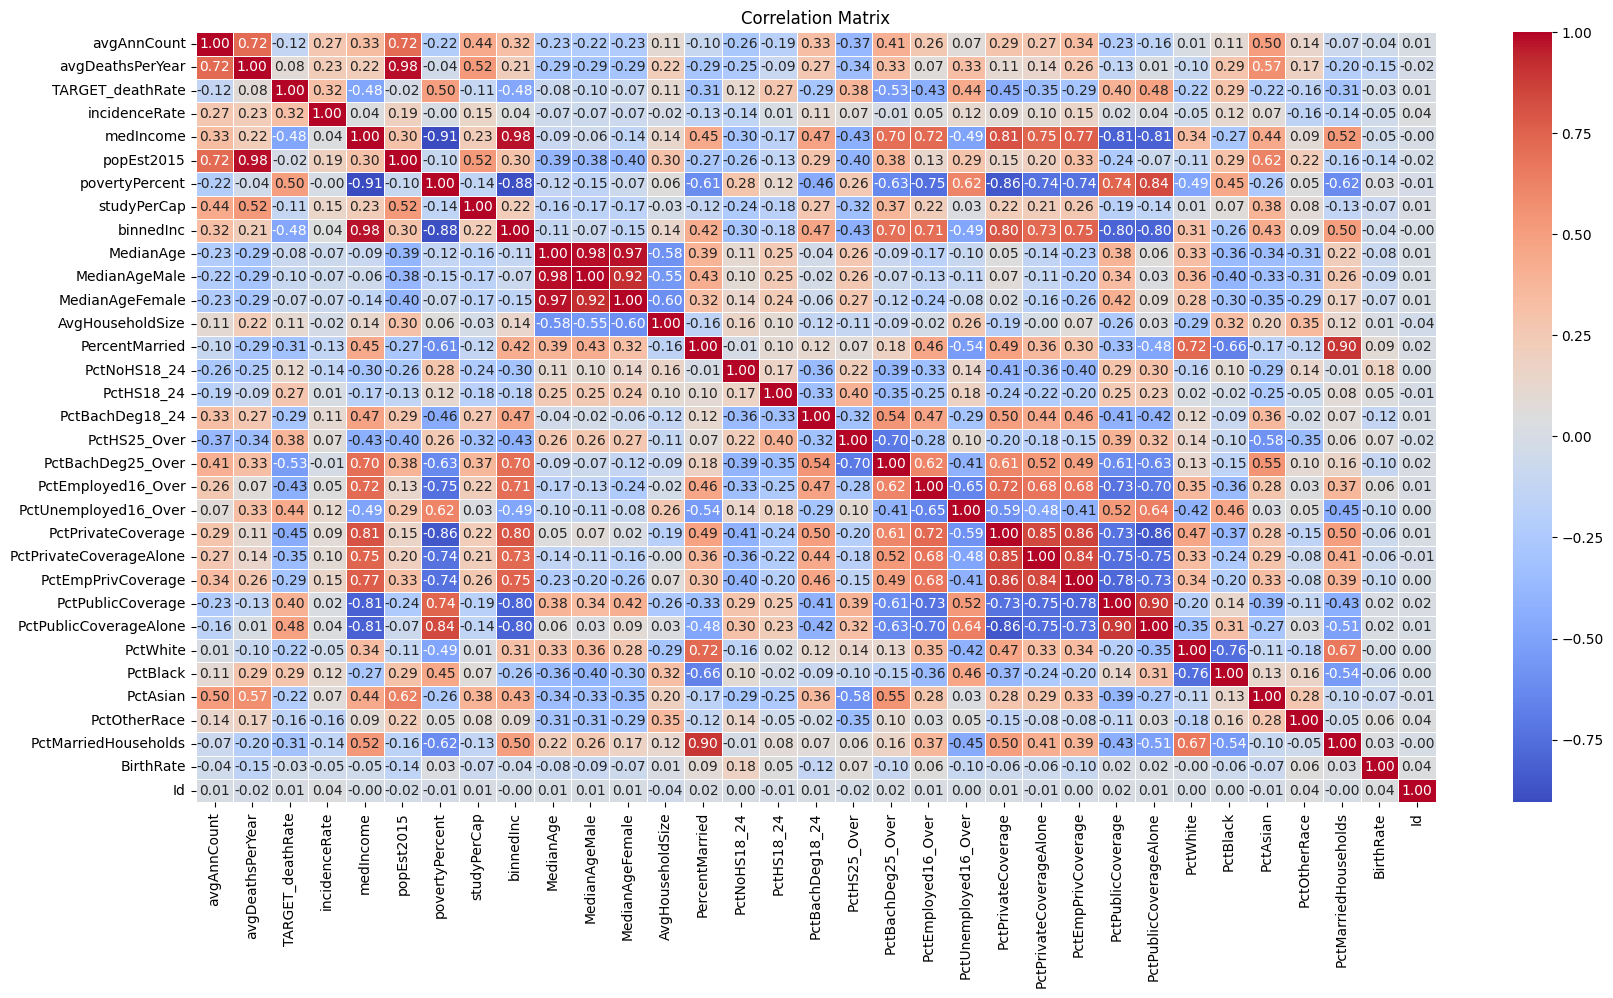

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix=df.corr()
# Create a heatmap using seaborn
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
y=df['TARGET_deathRate']
X=df.drop(['TARGET_deathRate','avgDeathsPerYear','avgAnnCount','popEst2015','povertyPercent','MedianAgeMale',
'MedianAgeFemale','PctPrivateCoverage','PctPrivateCoverageAlone','PctUnemployed16_Over',
'PctEmpPrivCoverage','PctPublicCoverage','PctOtherRace','PctWhite','PctHS25_Over','PctEmployed16_Over',
'PctBachDeg18_24','PctBlack','PctAsian','Id','PctBachDeg25_Over','PctMarriedHouseholds','MedianAge','binnedInc','PctPublicCoverageAlone',
           'PercentMarried'],axis=1)

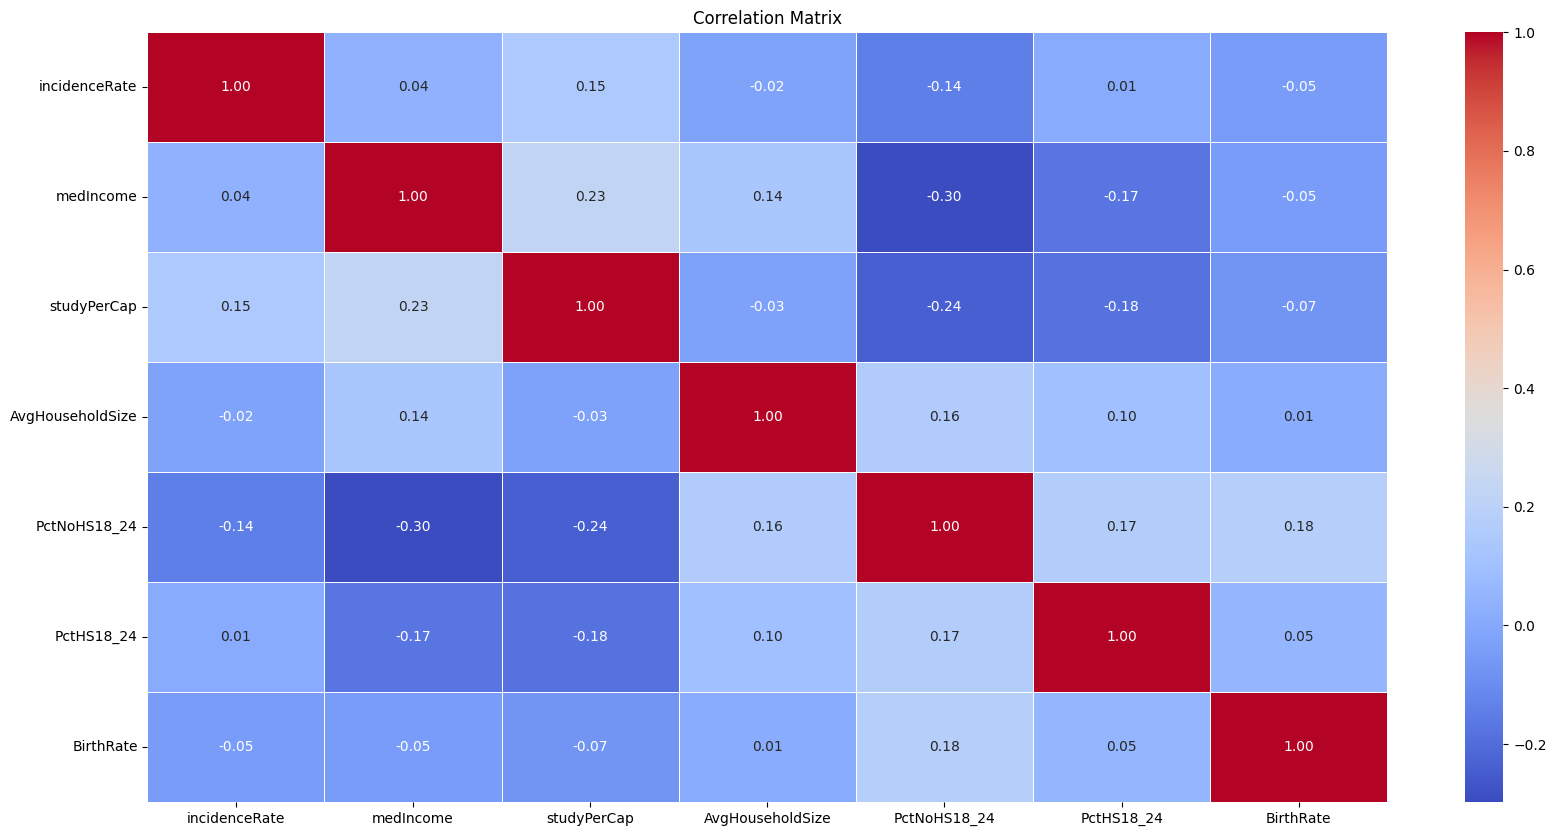

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix=X.corr()
# Create a heatmap using seaborn
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


**III. VARIABLES**

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets (60% training, 40% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and testing data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**IV. ACCESS BASELINE MODEL**

1.Find the average of the target variable

In [ ]:
y_mean = y_train.mean()

2.Create a numpy array called y_base filled with this value

In [ ]:
import numpy as np

In [ ]:
y_base = np.full(y_train.shape, y_mean)

3.Import the MSE and MAE from sklearn

In [ ]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

4.Display the MSE and MAE scores of this baseline model

In [ ]:
print(mse(y_train, y_base, squared=True))
print(mae(y_train, y_base))

527.6318455889051
18.362976230574976


**V. TRAINING MULTIVARIATE LINEAR REGRESSION (Feature Engineering)**

1.Import train_test_split from sklearn.model_selection

In [ ]:
from sklearn.model_selection import train_test_split

2.Instantiate the LinearRegression class into a variable called reg

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression()

3.Fit the model with the all features:

In [ ]:
reg.fit(X_train, y_train)

LinearRegression()

4.Use the trained model to predict the outcome on X_train and save them into y_train_preds

In [ ]:
y_train_preds = reg.predict(X_train)

5.Calculate the RMSE and MAE on the training datasets

In [ ]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [ ]:
print(mse(y_train, y_train_preds, squared=True))
print(mae(y_train, y_train_preds))

300.8843902405414
13.464135609836001


5. Import the altair package

In [ ]:
# %pip install altair

In [ ]:
import altair as alt

6. Display the predictions versus the target line charts on the training set

In [ ]:
y_train

2230    185.6
249     139.2
2041    176.7
1848    159.1
353     205.5
        ...  
2321    213.2
1568    224.8
1613    221.3
1855    189.0
1207    204.5
Name: TARGET_deathRate, Length: 1279, dtype: float64

In [ ]:
y_train_preds=pd.DataFrame(y_train_preds)

In [ ]:
y_train_preds=y_train_preds.rename(columns={0:"TARGET_deathRate_pred"})

In [ ]:
y_train=pd.DataFrame(y_train)

In [ ]:
# Resetting the index of y_train and y_train_preds DataFrames
y_train = y_train.reset_index(drop=True)
y_train_preds = y_train_preds.reset_index(drop=True)

In [ ]:
from sklearn.metrics import r2_score
# Calculate R-squared
r2 = r2_score(y_train, y_train_preds)

# Print R-squared
print("R-squared:", r2)

R-squared: 0.42974558348593284


In [ ]:
import altair as alt
import pandas as pd

# Combine the actual and predicted values into a single DataFrame
data = pd.DataFrame({
    'Actual Target': y_train['TARGET_deathRate'],
    'Predicted Values': y_train_preds['TARGET_deathRate_pred']
})

In [ ]:

# Create a perfect prediction line
perfect_prediction_line = alt.Chart(data).mark_line(color='green', point=True).encode(
    x='Actual Target',
    y=alt.Y('Actual Target', scale=alt.Scale(domain=[100, data['Actual Target'].max()], nice=True)),
    tooltip=['Actual Target', 'Predicted Values']
).properties(
    width=600,
    height=800
)

# Create scatter plot for predicted values
scatter_plot = alt.Chart(data).mark_circle(color='red', opacity=0.7).encode(
    x='Actual Target',
    y=alt.Y('Predicted Values', scale=alt.Scale(domain=[100, data['Predicted Values'].max()], nice=True)),
    tooltip=['Actual Target', 'Predicted Values']
)

In [ ]:

# Combine the charts
final_chart = (perfect_prediction_line + scatter_plot).properties(
    title='Training Set',
    width=600,
    height=800
).configure_title(
    anchor='middle'
).configure_legend(
    orient='top'
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
)


In [ ]:
final_chart

alt.LayerChart(...)

7. Display the predictions versus the target line charts on the testing set

In [ ]:
y_test_preds = reg.predict(X_test)

In [ ]:
y_test_preds=pd.DataFrame(y_test_preds)

In [ ]:
from sklearn.metrics import r2_score
# Calculate R-squared
r2 = r2_score(y_test, y_test_preds)

# Print R-squared
print("R-squared:", r2)

R-squared: 0.38930919466250424


In [ ]:
y_test_preds=y_test_preds.rename(columns={0:"TARGET_deathRate_pred"})

In [ ]:
y_test=pd.DataFrame(y_test)

In [ ]:
# Resetting the index of y_train and y_train_preds DataFrames
y_test = y_test.reset_index(drop=True)
y_test_preds = y_test_preds.reset_index(drop=True)

In [ ]:
import altair as alt
import pandas as pd

# Combine the actual and predicted values into a single DataFrame
data = pd.DataFrame({
    'Actual Target': y_test['TARGET_deathRate'],
    'Predicted Values': y_test_preds['TARGET_deathRate_pred']
})

# Create a perfect prediction line
perfect_prediction_line = alt.Chart(data).mark_line(color='green', point=True).encode(
    x='Actual Target',
    y=alt.Y('Actual Target', scale=alt.Scale(domain=[100, data['Actual Target'].max()], nice=True)),
    tooltip=['Actual Target', 'Predicted Values']
).properties(
    width=600,
    height=800
)

# Create scatter plot for predicted values
scatter_plot = alt.Chart(data).mark_circle(color='red', opacity=0.7).encode(
    x='Actual Target',
    y=alt.Y('Predicted Values', scale=alt.Scale(domain=[100, data['Predicted Values'].max()], nice=True)),
    tooltip=['Actual Target', 'Predicted Values']
)

# Combine the charts
final_chart = (perfect_prediction_line + scatter_plot).properties(
    title='Testing set',
    width=600,
    height=800
).configure_title(
    anchor='middle'
).configure_legend(
    orient='top'
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
)


In [ ]:
final_chart

alt.LayerChart(...)

In [ ]:
print(mse(y_test, y_test_preds, squared=True))
print(mae(y_test, y_test_preds))

300.34579040720604
13.319749301338094


In [ ]:
coef=reg.coef_
intercept=reg.intercept_

In [ ]:
coef=list(coef)

factors=list(X.columns)

print("Intercept: "+str(float(intercept)))
for i in range(len(factors)):
  print(str(factors[i])+": "+ "coef: " +str(coef[i]))

# Create a DataFrame from the data
coef_df = pd.DataFrame({'Factors': factors, 'Coefficients': coef})

# Create a bar chart using Altair
chart = alt.Chart(coef_df).mark_bar().encode(
    x='Factors',
    y='Coefficients',
    color=alt.condition(
        alt.datum.Coefficients > 0,
        alt.value('steelblue'),  # Positive coefficients in blue
        alt.value('orange')      # Negative coefficients in orange
    ),
    tooltip=['Factors', 'Coefficients']
).properties(
    title='Multivariate linear regression Coefficients',width=800,
    height=300
)

# Show the chart
chart

Intercept: 180.72931978107894
incidenceRate: coef: 7.691082436714465
medIncome: coef: -11.653645546265324
studyPerCap: coef: -0.3300747606960934
AvgHouseholdSize: coef: 4.06104902232023
PctNoHS18_24: coef: -0.6622221896871245
PctHS18_24: coef: 3.8191289497435594
BirthRate: coef: -0.8970655893783661


alt.Chart(...)

**V. TRAINING MULTIVARIATE LINEAR REGRESSION (LASSO)**

**1.Import train_test_split from sklearn.model_selection**

In [ ]:
from sklearn.model_selection import train_test_split

**2.Import the Lasso regression module from sklearn**

In [ ]:
from sklearn.linear_model import Lasso

**3.Instantiate the LinearRegression class into a variable called lasso_regp**

In [ ]:
lasso_reg = Lasso()

**4. Fit the model on the training set**

In [ ]:
lasso=lasso_reg.fit(X_train, y_train)

In [ ]:
import pickle
# Save the  model as a pickle file
with open('lasso_model.pkl', 'wb') as file:
    pickle.dump(lasso, file)

In [ ]:
lasso_coef=lasso.coef_
lasso_intercept=lasso.intercept_

**5. Import the MSE and MAE metrics from sklearn and display the RMSE and MAE scores on the training set**

In [ ]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [ ]:
y_train_preds = lasso_reg.predict(X_train)

In [ ]:
print(mse(y_train, y_train_preds, squared=True))

306.14774373985773


In [ ]:
print(mae(y_train, y_train_preds))

13.621141214405155


**6. Display the MSE and MAE scores on the testing set**

In [ ]:
y_test_preds = lasso_reg.predict(X_test)

In [ ]:
print(mse(y_test_preds, y_test, squared=True))

303.12128977592124


In [ ]:
print(mae(y_test, y_test_preds))

13.439460580503779


In [ ]:
from sklearn.metrics import r2_score
# Calculate R-squared
r2 = r2_score(y_test, y_test_preds)

# Print R-squared
print("R-squared:", r2)

R-squared: 0.38366579296076453


In [ ]:
y_train

,TARGET_deathRate
0,185.6
1,139.2
2,176.7
3,159.1
4,205.5
...,...
1274,213.2
1275,224.8
1276,221.3
1277,189.0


In [ ]:
y_train_preds=pd.DataFrame(y_train_preds)

In [ ]:
y_train_preds=y_train_preds.rename(columns={0:"TARGET_deathRate_pred"})

In [ ]:
import altair as alt
import pandas as pd

# Combine the actual and predicted values into a single DataFrame
data = pd.DataFrame({
    'Actual Target': y_train['TARGET_deathRate'],
    'Predicted Values': y_train_preds['TARGET_deathRate_pred']
})

# Create a perfect prediction line
perfect_prediction_line = alt.Chart(data).mark_line(color='green', point=True).encode(
    x='Actual Target',
    y=alt.Y('Actual Target', scale=alt.Scale(domain=[100, data['Actual Target'].max()], nice=True)),
    tooltip=['Actual Target', 'Predicted Values']
).properties(
    width=600,
    height=800
)

# Create scatter plot for predicted values
scatter_plot = alt.Chart(data).mark_circle(color='red', opacity=0.7).encode(
    x='Actual Target',
    y=alt.Y('Predicted Values', scale=alt.Scale(domain=[100, data['Predicted Values'].max()], nice=True)),
    tooltip=['Actual Target', 'Predicted Values']
)

# Combine the charts
final_chart = (perfect_prediction_line + scatter_plot).properties(
    title='Training Set',
    width=600,
    height=800
).configure_title(
    anchor='middle'
).configure_legend(
    orient='top'
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
)


In [ ]:
final_chart

alt.LayerChart(...)

In [ ]:
y_test_preds=pd.DataFrame(y_test_preds)

In [ ]:
y_test_preds=y_test_preds.rename(columns={0:"TARGET_deathRate_pred"})

In [ ]:
import altair as alt
import pandas as pd

# Combine the actual and predicted values into a single DataFrame
data = pd.DataFrame({
    'Actual Target': y_test['TARGET_deathRate'],
    'Predicted Values': y_test_preds['TARGET_deathRate_pred']
})

# Create a perfect prediction line
perfect_prediction_line = alt.Chart(data).mark_line(color='green', point=True).encode(
    x='Actual Target',
    y=alt.Y('Actual Target', scale=alt.Scale(domain=[100, data['Actual Target'].max()], nice=True)),
    tooltip=['Actual Target', 'Predicted Values']
).properties(
    width=600,
    height=800
)

# Create scatter plot for predicted values
scatter_plot = alt.Chart(data).mark_circle(color='red', opacity=0.7).encode(
    x='Actual Target',
    y=alt.Y('Predicted Values', scale=alt.Scale(domain=[100, data['Predicted Values'].max()], nice=True)),
    tooltip=['Actual Target', 'Predicted Values']
)

# Combine the charts
final_chart = (perfect_prediction_line + scatter_plot).properties(
    title='Testing set',
    width=600,
    height=800
).configure_title(
    anchor='middle'
).configure_legend(
    orient='top'
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
)


In [ ]:
final_chart

alt.LayerChart(...)

**7. Display coefficient and intercept**

In [ ]:
coef_of_lasso=list(lasso_coef)

In [ ]:
factors=list(X.columns)

In [ ]:
print(len(factors))
print(len(coef_of_lasso))

7
7


In [ ]:
print("Lasso Intercept: "+str(float(lasso_intercept)))
for i in range(len(factors)):
  print(str(factors[i])+": "+ "coef: " +str(coef_of_lasso[i]))

Lasso Intercept: 180.72931978107894
incidenceRate: coef: 6.773394029119613
medIncome: coef: -10.447737066858235
studyPerCap: coef: -0.0
AvgHouseholdSize: coef: 2.8612087090368163
PctNoHS18_24: coef: -0.0
PctHS18_24: coef: 3.040139833867483
BirthRate: coef: -0.0


In [ ]:
# Create a DataFrame from the data
coef_df = pd.DataFrame({'Factors': factors, 'Coefficients': coef_of_lasso})

# Create a bar chart using Altair
chart = alt.Chart(coef_df).mark_bar().encode(
    x='Factors',
    y='Coefficients',
    color=alt.condition(
        alt.datum.Coefficients > 0,
        alt.value('steelblue'),  # Positive coefficients in blue
        alt.value('orange')      # Negative coefficients in orange
    ),
    tooltip=['Factors', 'Coefficients']
).properties(
    title='Lasso Regression Coefficients',width=800,
    height=300
)

# Show the chart
chart

alt.Chart(...)

**VI. TRAINING MULTIVARIATE LINEAR REGRESSION (Ridge)**

**1.Import train_test_split from sklearn.model_selection**

In [ ]:
from sklearn.model_selection import train_test_split

**2.Import the Ridge regression module from sklearn**

In [ ]:
from sklearn.linear_model import Ridge

**3.Instantiate the LinearRegression class into a variable called ridge_reg**

In [ ]:
ridge = Ridge()

**4. Fit the model on the training set**

In [ ]:
ridge.fit(X_train, y_train)

Ridge()

In [ ]:
import pickle
# Save the  model as a pickle file
with open('ridge_model.pkl', 'wb') as file:
    pickle.dump(ridge, file)

In [ ]:
ridge_coef=ridge.coef_
ridge_intercept=ridge.intercept_

In [ ]:
ridge_coef

array([[  7.68553183, -11.64269096,  -0.33092484,   4.05590459,
         -0.65861631,   3.81792366,  -0.89684036]])

**5. Import the MSE and MAE metrics from sklearn and display the RMSE and MAE scores on the training set**

In [ ]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [ ]:
y_train_preds = ridge.predict(X_train)

In [ ]:
print(mse(y_train, y_train_preds, squared=True))

300.88454501994784


In [ ]:
print(mae(y_train, y_train_preds))

13.464299754837397


**6. Display the MSE and MAE scores on the testing set**

In [ ]:
y_test_preds = ridge.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
# Calculate R-squared
r2 = r2_score(y_test, y_test_preds)

# Print R-squared
print("R-squared:", r2)

R-squared: 0.38935807046403303


In [ ]:
print(mse(y_test_preds, y_test, squared=True))

300.321752643556


In [ ]:
print(mae(y_test, y_test_preds))

13.319302113441312


In [ ]:
from sklearn.metrics import r2_score
# Calculate R-squared
r2 = r2_score(y_test, y_test_preds)

# Print R-squared
print("R-squared:", r2)

R-squared: 0.38935807046403303


In [ ]:
y_train

,TARGET_deathRate
0,185.6
1,139.2
2,176.7
3,159.1
4,205.5
...,...
1274,213.2
1275,224.8
1276,221.3
1277,189.0


In [ ]:
y_train_preds=pd.DataFrame(y_train_preds)

In [ ]:
y_train_preds=y_train_preds.rename(columns={0:"TARGET_deathRate_pred"})

In [ ]:
import altair as alt
import pandas as pd

# Combine the actual and predicted values into a single DataFrame
data = pd.DataFrame({
    'Actual Target': y_train['TARGET_deathRate'],
    'Predicted Values': y_train_preds['TARGET_deathRate_pred']
})

# Create a perfect prediction line
perfect_prediction_line = alt.Chart(data).mark_line(color='green', point=True).encode(
    x='Actual Target',
    y=alt.Y('Actual Target', scale=alt.Scale(domain=[100, data['Actual Target'].max()], nice=True)),
    tooltip=['Actual Target', 'Predicted Values']
).properties(
    width=600,
    height=800
)

# Create scatter plot for predicted values
scatter_plot = alt.Chart(data).mark_circle(color='red', opacity=0.7).encode(
    x='Actual Target',
    y=alt.Y('Predicted Values', scale=alt.Scale(domain=[100, data['Predicted Values'].max()], nice=True)),
    tooltip=['Actual Target', 'Predicted Values']
)

# Combine the charts
final_chart = (perfect_prediction_line + scatter_plot).properties(
    title='Training Set',
    width=600,
    height=800
).configure_title(
    anchor='middle'
).configure_legend(
    orient='top'
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
)


In [ ]:
final_chart

alt.LayerChart(...)

In [ ]:
y_test_preds=pd.DataFrame(y_test_preds)

In [ ]:
y_test_preds=y_test_preds.rename(columns={0:"TARGET_deathRate_pred"})

In [ ]:
import altair as alt
import pandas as pd

# Combine the actual and predicted values into a single DataFrame
data = pd.DataFrame({
    'Actual Target': y_test['TARGET_deathRate'],
    'Predicted Values': y_test_preds['TARGET_deathRate_pred']
})

# Create a perfect prediction line
perfect_prediction_line = alt.Chart(data).mark_line(color='green', point=True).encode(
    x='Actual Target',
    y=alt.Y('Actual Target', scale=alt.Scale(domain=[100, data['Actual Target'].max()], nice=True)),
    tooltip=['Actual Target', 'Predicted Values']
).properties(
    width=600,
    height=800
)

# Create scatter plot for predicted values
scatter_plot = alt.Chart(data).mark_circle(color='red', opacity=0.7).encode(
    x='Actual Target',
    y=alt.Y('Predicted Values', scale=alt.Scale(domain=[100, data['Predicted Values'].max()], nice=True)),
    tooltip=['Actual Target', 'Predicted Values']
)

# Combine the charts
final_chart = (perfect_prediction_line + scatter_plot).properties(
    title='Testing set',
    width=600,
    height=800
).configure_title(
    anchor='middle'
).configure_legend(
    orient='top'
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
)


In [ ]:
final_chart

alt.LayerChart(...)

**7. Display coefficient and intercept**

In [ ]:
ridge_coef

array([[  7.68553183, -11.64269096,  -0.33092484,   4.05590459,
         -0.65861631,   3.81792366,  -0.89684036]])

In [ ]:
coef_of_ridge=[item for sublist in ridge_coef for item in sublist]

In [ ]:
factors=list(X.columns)

In [ ]:
print(len(factors))
print(len(coef_of_ridge))

7
7


In [ ]:
print("Ridge Intercept: "+str(float(ridge_intercept)))
for i in range(len(factors)):
  print(str(factors[i])+": "+ "coef: " +str(coef_of_ridge[i]))

Ridge Intercept: 180.72931978107894
incidenceRate: coef: 7.685531830167503
medIncome: coef: -11.64269095670392
studyPerCap: coef: -0.3309248415547019
AvgHouseholdSize: coef: 4.055904594435365
PctNoHS18_24: coef: -0.658616311991117
PctHS18_24: coef: 3.817923657739886
BirthRate: coef: -0.8968403562543483


In [ ]:
# Create a DataFrame from the data
coef_df = pd.DataFrame({'Factors': factors, 'Coefficients': coef_of_ridge})

# Create a bar chart using Altair
chart = alt.Chart(coef_df).mark_bar().encode(
    x='Factors',
    y='Coefficients',
    color=alt.condition(
        alt.datum.Coefficients > 0,
        alt.value('steelblue'),  # Positive coefficients in blue
        alt.value('orange')      # Negative coefficients in orange
    ),
    tooltip=['Factors', 'Coefficients']
).properties(
    title='Ridge Regression Coefficients',width=800,
    height=300
)

# Show the chart
chart

alt.Chart(...)

**VI. TRAINING MULTIVARIATE LINEAR REGRESSION (ElasticNet)**

**1.Import train_test_split from sklearn.model_selection**

In [ ]:
from sklearn.model_selection import train_test_split

**2.Import the ElasticNet regression module from sklearn**

In [ ]:
from sklearn.linear_model import ElasticNet

**3.Instantiate the LinearRegression class into a variable called elastic**

In [ ]:
# Initialize ElasticNet model with a higher L2 ratio
elastic = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)

**4. Fit the model on the training set**

In [ ]:
elastic.fit(X_train, y_train)

ElasticNet(random_state=42)

In [ ]:
import pickle
# Save the  model as a pickle file
with open('elastic_net_model.pkl', 'wb') as file:
    pickle.dump(elastic, file)

In [ ]:
elastic_coef=elastic.coef_
elastic_intercept=elastic.intercept_

**5. Import the MSE and MAE metrics from sklearn and display the RMSE and MAE scores on the training set**

In [ ]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [ ]:
y_train_preds = elastic.predict(X_train)

In [ ]:
print(mse(y_train, y_train_preds, squared=True))

332.6225710610584


In [ ]:
print(mae(y_train, y_train_preds))

14.339195161515557


**6. Display the MSE and MAE scores on the testing set**

In [ ]:
y_test_preds = elastic.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
# Calculate R-squared
r2 = r2_score(y_test, y_test_preds)

# Print R-squared
print("R-squared:", r2)

R-squared: 0.3488068102164953


In [ ]:
print(mse(y_test_preds, y_test, squared=True))

320.2653971271571


In [ ]:
print(mae(y_test, y_test_preds))

14.007543059950601


In [ ]:
from sklearn.metrics import r2_score
# Calculate R-squared
r2 = r2_score(y_test, y_test_preds)

# Print R-squared
print("R-squared:", r2)

R-squared: 0.3488068102164953


In [ ]:
y_train

,TARGET_deathRate
0,185.6
1,139.2
2,176.7
3,159.1
4,205.5
...,...
1274,213.2
1275,224.8
1276,221.3
1277,189.0


In [ ]:
y_train_preds=pd.DataFrame(y_train_preds)

In [ ]:
y_train_preds=y_train_preds.rename(columns={0:"TARGET_deathRate_pred"})

In [ ]:
import altair as alt
import pandas as pd

# Combine the actual and predicted values into a single DataFrame
data = pd.DataFrame({
    'Actual Target': y_train['TARGET_deathRate'],
    'Predicted Values': y_train_preds['TARGET_deathRate_pred']
})

# Create a perfect prediction line
perfect_prediction_line = alt.Chart(data).mark_line(color='green', point=True).encode(
    x='Actual Target',
    y=alt.Y('Actual Target', scale=alt.Scale(domain=[100, data['Actual Target'].max()], nice=True)),
    tooltip=['Actual Target', 'Predicted Values']
).properties(
    width=600,
    height=800
)

# Create scatter plot for predicted values
scatter_plot = alt.Chart(data).mark_circle(color='red', opacity=0.7).encode(
    x='Actual Target',
    y=alt.Y('Predicted Values', scale=alt.Scale(domain=[100, data['Predicted Values'].max()], nice=True)),
    tooltip=['Actual Target', 'Predicted Values']
)

# Combine the charts
final_chart = (perfect_prediction_line + scatter_plot).properties(
    title='Training Set',
    width=600,
    height=800
).configure_title(
    anchor='middle'
).configure_legend(
    orient='top'
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
)


In [ ]:
final_chart

alt.LayerChart(...)

In [ ]:
y_test_preds=pd.DataFrame(y_test_preds)

In [ ]:
y_test_preds=y_test_preds.rename(columns={0:"TARGET_deathRate_pred"})

In [ ]:
import altair as alt
import pandas as pd

# Combine the actual and predicted values into a single DataFrame
data = pd.DataFrame({
    'Actual Target': y_test['TARGET_deathRate'],
    'Predicted Values': y_test_preds['TARGET_deathRate_pred']
})

# Create a perfect prediction line
perfect_prediction_line = alt.Chart(data).mark_line(color='green', point=True).encode(
    x='Actual Target',
    y=alt.Y('Actual Target', scale=alt.Scale(domain=[100, data['Actual Target'].max()], nice=True)),
    tooltip=['Actual Target', 'Predicted Values']
).properties(
    width=600,
    height=800
)

# Create scatter plot for predicted values
scatter_plot = alt.Chart(data).mark_circle(color='red', opacity=0.7).encode(
    x='Actual Target',
    y=alt.Y('Predicted Values', scale=alt.Scale(domain=[100, data['Predicted Values'].max()], nice=True)),
    tooltip=['Actual Target', 'Predicted Values']
)

# Combine the charts
final_chart = (perfect_prediction_line + scatter_plot).properties(
    title='Testing set',
    width=600,
    height=800
).configure_title(
    anchor='middle'
).configure_legend(
    orient='top'
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
)


In [ ]:
final_chart

alt.LayerChart(...)

**7. Display coefficient and intercept**

In [ ]:
elastic_coef

array([ 4.83694232, -7.18312072, -0.27888491,  1.91932922,  0.05712261,
        2.79242037, -0.2904565 ])

In [ ]:
coef_of_elastic=elastic_coef.tolist()

In [ ]:
factors=list(X.columns)

In [ ]:
print(len(factors))
print(len(coef_of_elastic))

7
7


In [ ]:
print("ElasticNet Intercept: "+str(float(elastic_intercept)))
for i in range(len(factors)):
  print(str(factors[i])+": "+ "coef: " +str(coef_of_elastic[i]))

ElasticNet Intercept: 180.72931978107894
incidenceRate: coef: 4.836942319469652
medIncome: coef: -7.183120723641716
studyPerCap: coef: -0.27888490781937114
AvgHouseholdSize: coef: 1.9193292223360023
PctNoHS18_24: coef: 0.05712260937605077
PctHS18_24: coef: 2.7924203701417616
BirthRate: coef: -0.2904565011026151


In [ ]:
# Create a DataFrame from the data
coef_df = pd.DataFrame({'Factors': factors, 'Coefficients': coef_of_elastic})

# Create a bar chart using Altair
chart = alt.Chart(coef_df).mark_bar().encode(
    x='Factors',
    y='Coefficients',
    color=alt.condition(
        alt.datum.Coefficients > 0,
        alt.value('steelblue'),  # Positive coefficients in blue
        alt.value('orange')      # Negative coefficients in orange
    ),
    tooltip=['Factors', 'Coefficients']
).properties(
    title='ElasticNet Regression Coefficients',width=800,
    height=300
)

# Show the chart
chart

alt.Chart(...)